Loading packages

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [124]:
from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

from xgboost import XGBClassifier, plot_importance

In [125]:
#!pip install imblearn

importing data

In [126]:
data = pd.read_csv('Data/Myocardial infarction complications Database.csv')
data.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Data Analysis

In [127]:
data.shape 

(1700, 124)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [129]:
data.axes

[RangeIndex(start=0, stop=1700, step=1),
 Index(['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
        'IBS_NASL', 'GB', 'SIM_GIPERT',
        ...
        'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV',
        'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'],
       dtype='object', length=124)]

In [130]:
data.describe()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1700.000000,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,425.750000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.500000,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1275.250000,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1700.000000,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [131]:
data.ndim

2

In [132]:
#checking for unique vales
data.nunique()

ID           1700
AGE            62
SEX             2
INF_ANAM        4
STENOK_AN       7
             ... 
DRESSLER        2
ZSN             2
REC_IM          2
P_IM_STEN       2
LET_IS          8
Length: 124, dtype: int64

In [133]:
#checking for duplicate records
data[data.index.duplicated()]

# There is no duplicate values

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS


Handling Missing Values

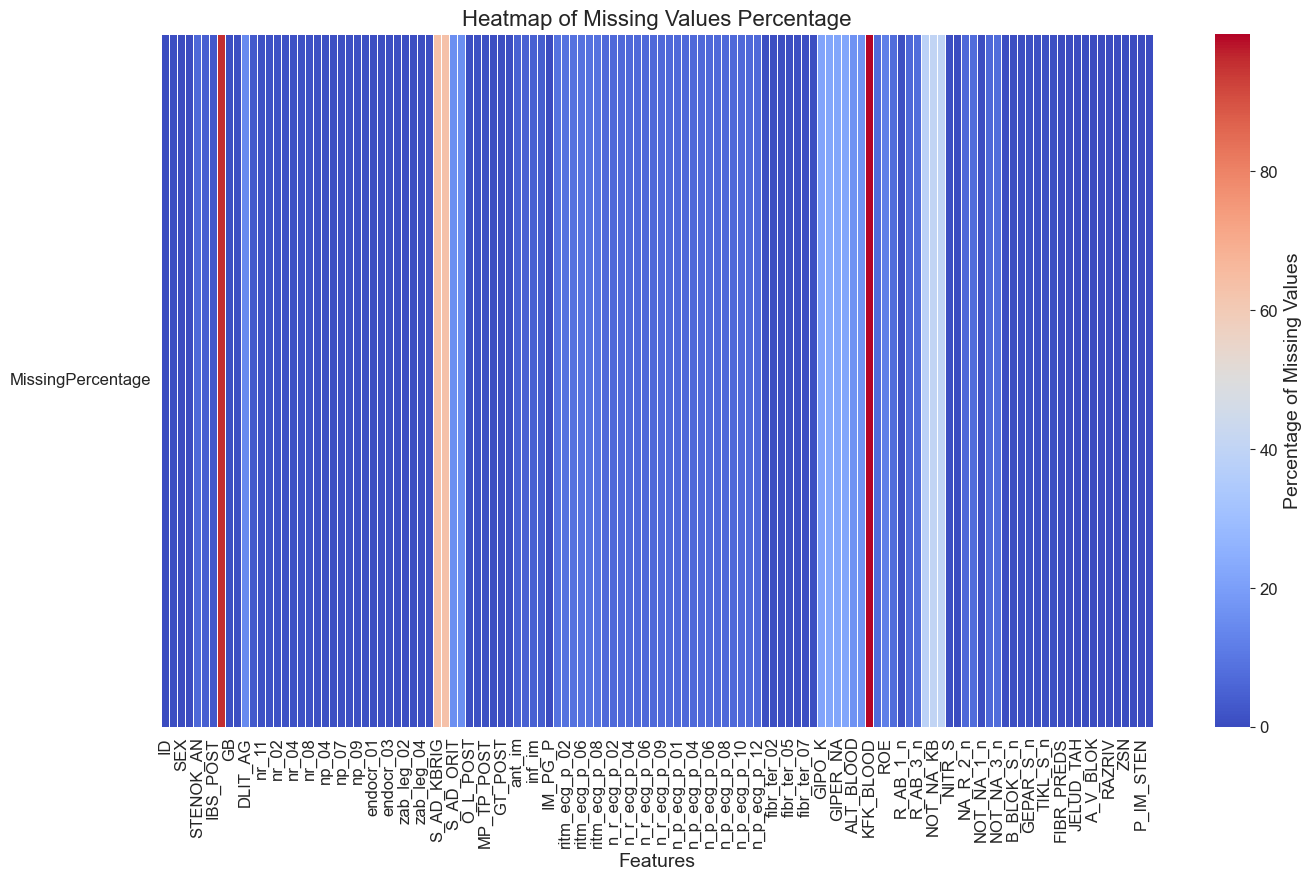

In [134]:
missing_percentage = data.isnull().mean() * 100
missing_percentage_df = pd.DataFrame(missing_percentage, columns=['MissingPercentage'])
missing_percentage_df = missing_percentage_df.T

plt.figure(figsize=(16, 9))
cmap = sns.color_palette("coolwarm", as_cmap=True)
ax = sns.heatmap(missing_percentage_df, cmap=cmap,cbar=True, linewidths=.5, fmt='.1f')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Percentage of Missing Values', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Heatmap of Missing Values Percentage', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.show()

In [135]:
# identify columns with missing values
cols_with_missing = data.columns[data.isnull().any()]
# display columns with missing values
print(cols_with_missing)

Index(['AGE', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL',
       'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A',
       ...
       'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n',
       'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n'],
      dtype='object', length=110)


In [136]:
mean_missing = data.isna().mean()
data = data.loc[:, mean_missing < 0.25] #answer?

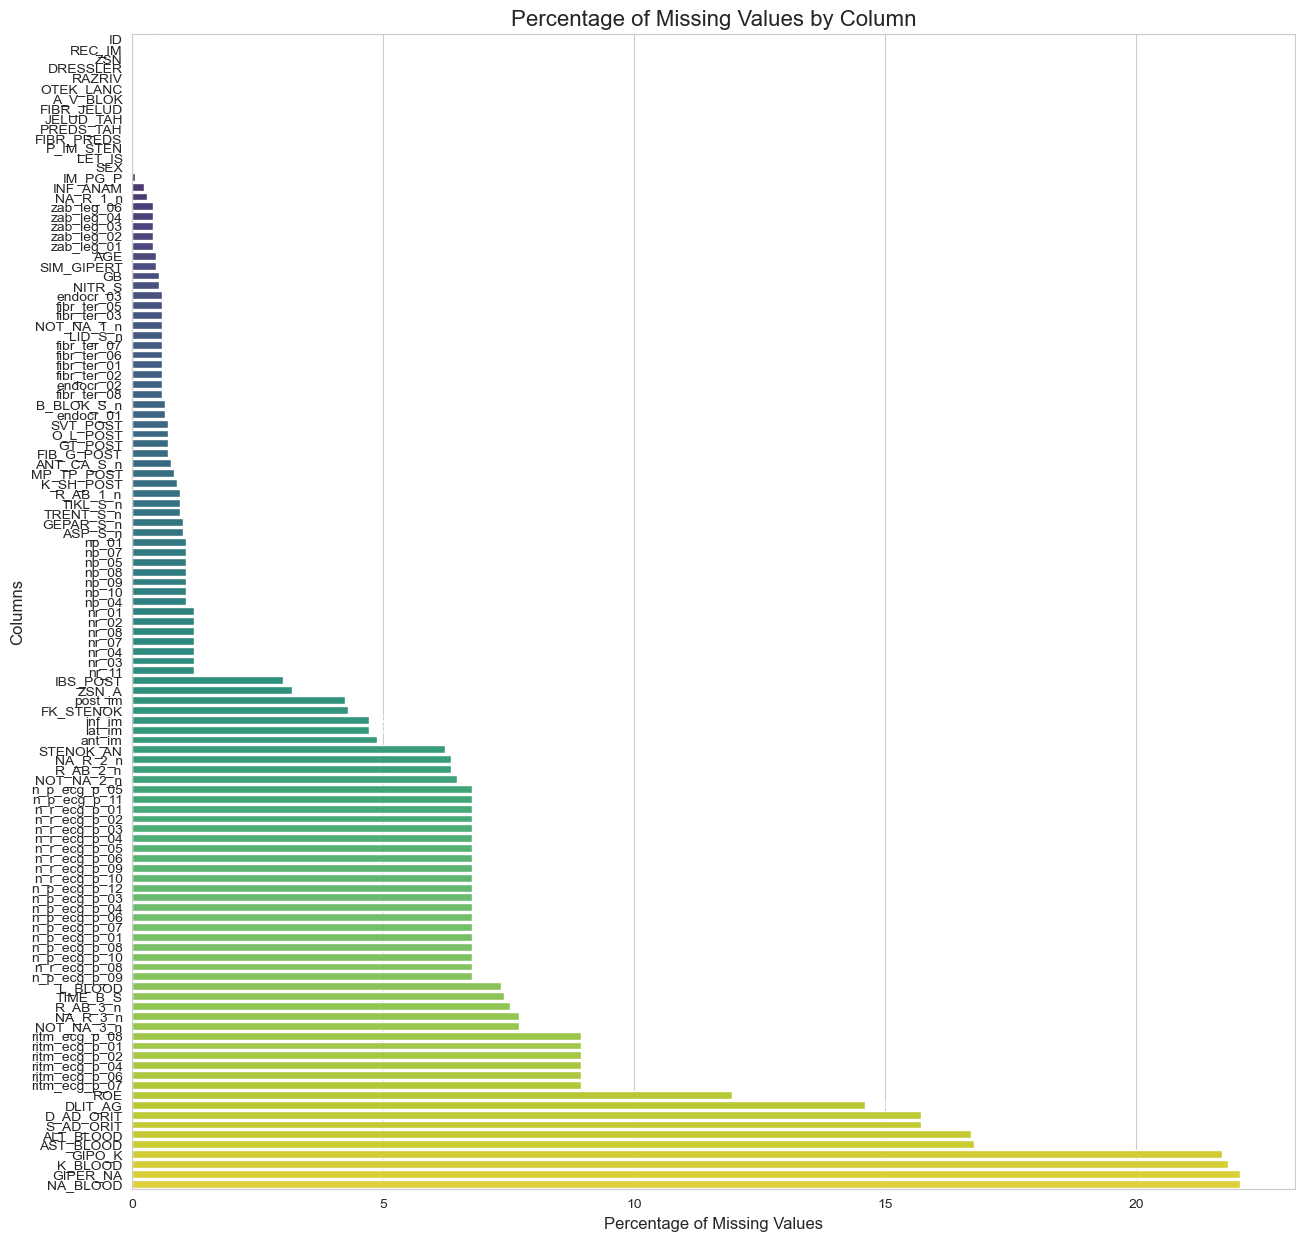

In [137]:
missing_percentage = data.isna().mean() * 100
missing_percentage = missing_percentage.sort_values()

plt.figure(figsize=(15, 15))
sns.set_style("whitegrid")
ax = sns.barplot(x=missing_percentage, y=missing_percentage.index, palette='viridis')

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}%', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center', 
                xytext=(5, 0), 
                textcoords='offset points', 
                fontsize=6, color='white', weight='bold')

plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Percentage of Missing Values', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.show()


In [138]:
columns_numerical = ['AGE','S_AD_ORIT','D_AD_ORIT','ROE','K_BLOOD','NA_BLOOD','ALT_BLOOD','AST_BLOOD','L_BLOOD']
columns_binary = ['SEX','SIM_GIPERT','nr_11','nr_01','nr_02','nr_03','nr_04','nr_07','nr_08','np_01','np_04','np_05','np_07','np_08','np_09','np_10','endocr_01','endocr_02','endocr_03','zab_leg_01','zab_leg_02','zab_leg_03','zab_leg_04','zab_leg_06','O_L_POST','K_SH_POST','MP_TP_POST','SVT_POST','GT_POST','FIB_G_POST','IM_PG_P','ritm_ecg_p_01','ritm_ecg_p_02','ritm_ecg_p_04','ritm_ecg_p_06','ritm_ecg_p_07','ritm_ecg_p_08','n_r_ecg_p_01','n_r_ecg_p_02','n_r_ecg_p_03','n_r_ecg_p_04','n_r_ecg_p_05','n_r_ecg_p_06','n_r_ecg_p_08','n_r_ecg_p_09','n_r_ecg_p_10','n_p_ecg_p_01','n_p_ecg_p_03','n_p_ecg_p_04','n_p_ecg_p_05','n_p_ecg_p_06','n_p_ecg_p_07','n_p_ecg_p_08','n_p_ecg_p_09','n_p_ecg_p_10','n_p_ecg_p_11','n_p_ecg_p_12','fibr_ter_01','fibr_ter_02','fibr_ter_03','fibr_ter_05','fibr_ter_06','fibr_ter_07','fibr_ter_08','GIPO_K','GIPER_NA','LID_S_n','B_BLOK_S_n','ANT_CA_S_n','GEPAR_S_n','ASP_S_n','TIKL_S_n','TRENT_S_n', 'NITR_S']
columns_ordinal = ['INF_ANAM','STENOK_AN','FK_STENOK','IBS_POST','GB','DLIT_AG','ZSN_A','ant_im','lat_im','inf_im','post_im','TIME_B_S','R_AB_1_n','R_AB_2_n','R_AB_3_n','NA_R_1_n','NA_R_2_n','NA_R_3_n','NOT_NA_1_n','NOT_NA_2_n','NOT_NA_3_n']

median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

data[columns_numerical] = mean_imputer.fit_transform(data[columns_numerical])
data[columns_binary] = mode_imputer.fit_transform(data[columns_binary])

In [139]:
missing_df = data.copy()
selected_data = missing_df[columns_ordinal]
selected_columns = selected_data.columns.to_list()

knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(selected_data)
imputed_df=pd.DataFrame(imputed_data, columns = selected_columns)
data.update(imputed_df)

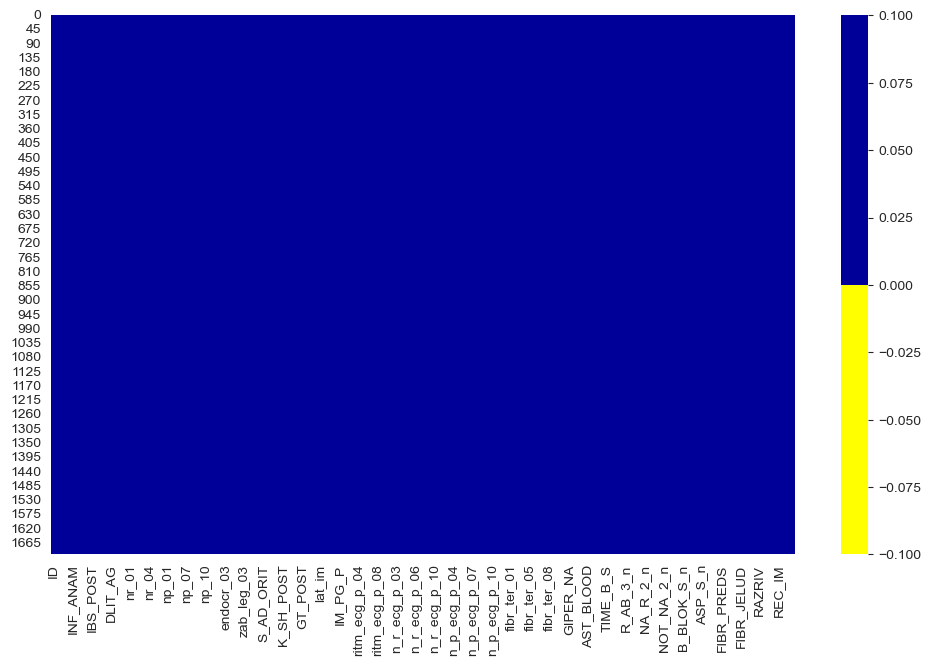

In [140]:
#heatmap for NA values
plt.figure(figsize=(12,7))
colours = ['#ffff00','#000099'] # specify the colours - yellow is  missing. blue is not missing.
sns.heatmap(data.isnull(),
            cmap = sns.color_palette(colours))
plt.show()

In [141]:
data.isnull()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1696,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Setting x and y variables

In [142]:
x = data.iloc[:,1:105]
x_day1=data[['R_AB_1_n','NA_R_1_n','NOT_NA_1_n']]
x_day2=data[['R_AB_2_n','NA_R_2_n','NOT_NA_2_n']]
x_day3=data[['R_AB_3_n','NA_R_3_n','NOT_NA_3_n']]
x.drop(columns=['R_AB_1_n','R_AB_2_n','R_AB_3_n', 'NA_R_1_n','NA_R_2_n','NA_R_3_n', 'NOT_NA_1_n','NOT_NA_2_n','NOT_NA_3_n'], inplace=True)

y_lo = data['LET_IS']

In [143]:
x.head()
# y_lo.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,ROE,TIME_B_S,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1.0,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,16.00000,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.00000,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,13.44489,3.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,13.44489,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,13.44489,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


Distributions

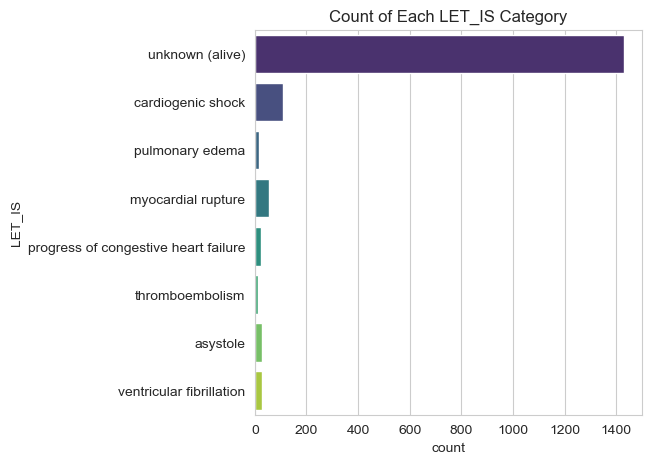

In [144]:
# Define the label mapping
label_mapping = {
    0: 'unknown (alive)',
    1: 'cardiogenic shock',
    2: 'pulmonary edema',
    3: 'myocardial rupture',
    4: 'progress of congestive heart failure',
    5: 'thromboembolism',
    6: 'asystole',
    7: 'ventricular fibrillation'
}

plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.countplot(y='LET_IS', data=data, palette='viridis', order=sorted(data['LET_IS'].unique()))
plt.title('Count of Each LET_IS Category')
plt.yticks(ticks=range(len(label_mapping)), labels=label_mapping.values(),ha='right')
plt.show()

In [145]:
# Define the data with names and counts
data_dict = {
    'LET_IS': [
        'unknown (alive)', 'cardiogenic shock', 'pulmonary edema',
        'myocardial rupture', 'progress of congestive heart failure',
        'thromboembolism', 'asystole', 'ventricular fibrillation'
    ],
    'count': [1429, 110, 18, 54, 23, 12, 27, 27],
    'proportion': [84.06, 6.47, 1.06, 3.18, 1.35, 0.71, 1.59, 1.59]
}

# Create a DataFrame
data_df = pd.DataFrame(data_dict)

# Create the pie chart using Plotly Express
fig = px.pie(
    data_df, 
    names='LET_IS', 
    values='count', 
    title='Lethal Outcome (cause)',
    labels={'LET_IS': 'Lethal Outcome'},
    hover_data=['count', 'proportion']
)

# Customize the text and hover templates
fig.update_traces(
    textinfo='percent',  # Only show percentages in the pie chart segments
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Proportion: %{customdata[1]:.2f}%'
)

# Display the figure
fig.show()

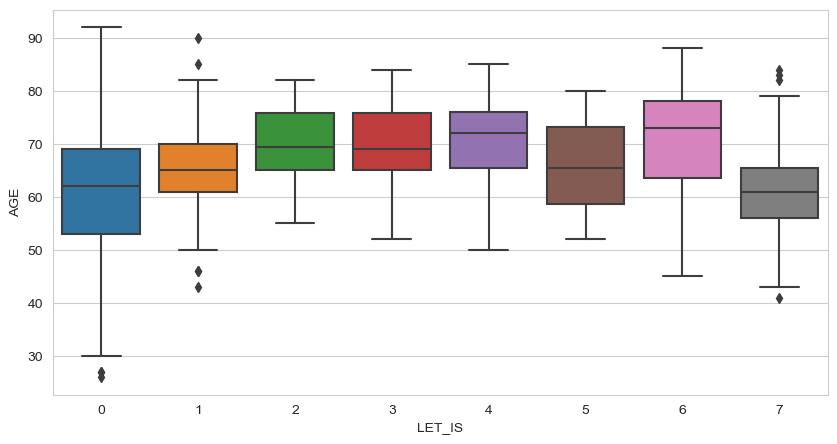

In [146]:
# AgeWise Lethal Outcome
plt.figure(figsize=(10,5))
sns.boxplot(x='LET_IS',y='AGE',data=data)
plt.show()

Relation with SEX

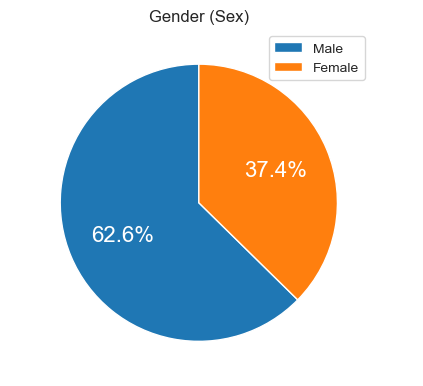

In [147]:
fig, ax = plt.subplots(figsize=(4.5,4.5))
patches, texts, pcts = ax.pie(data['SEX'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, textprops={'color': 'white', 'fontsize': 16})
plt.legend(patches, ['Male', 'Female'], loc="best")
plt.title('Gender (Sex)')
plt.show()

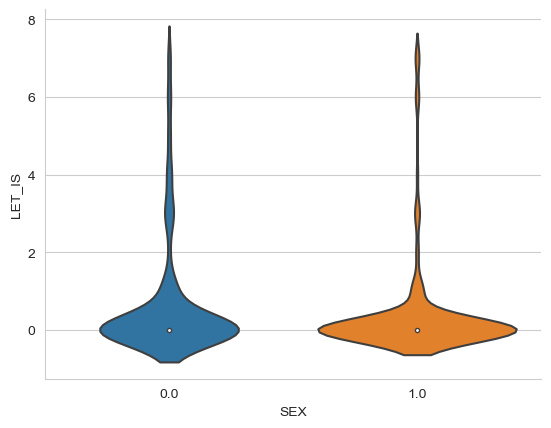

In [148]:
#Violin Plot
sns.violinplot(data = data , x= 'SEX', y= 'LET_IS')
sns.despine()

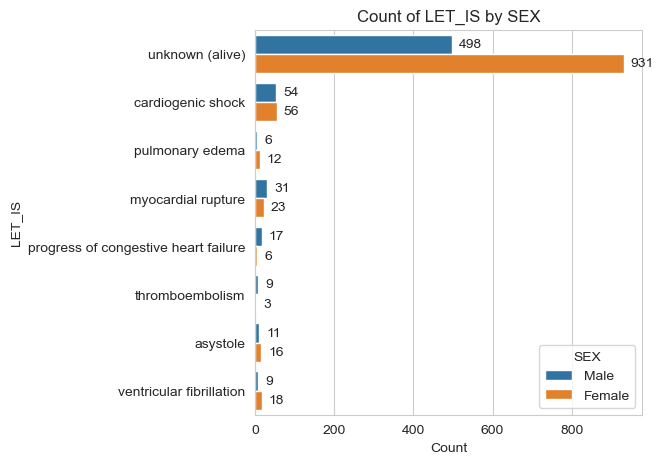

In [149]:
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
ax = sns.countplot(data=data, y='LET_IS', hue='SEX')
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                 (p.get_width(), p.get_y() + p.get_height() / 2.), 
                 ha='left', va='center', 
                 xytext=(5, 0), 
                 textcoords='offset points')
plt.title('Count of LET_IS by SEX')
plt.ylabel('LET_IS')
plt.xlabel('Count')
plt.yticks(range(len(label_mapping)), label_mapping.values(), ha='right')
plt.legend(title='SEX', labels=['Male', 'Female'])
plt.show()

We can see that the highest lethal outcome is of unknown (alive) is in the Male while less in Female.
The cardiogenic shock is equally the same in both the Gender. 
The pulmonary edema is more in male than the females 
The myocardial rupture is more in female than the male 
The progress of congestive heart failure and thromboembolism is also more in female than male
And the asystole and ventricular fibrillation is little more in male as comapared to female.

Relation with Age

Observation: As we can observe maximum Lethal Outcome cause is ranging between 50 to 80 age, highest propotion is in their 65

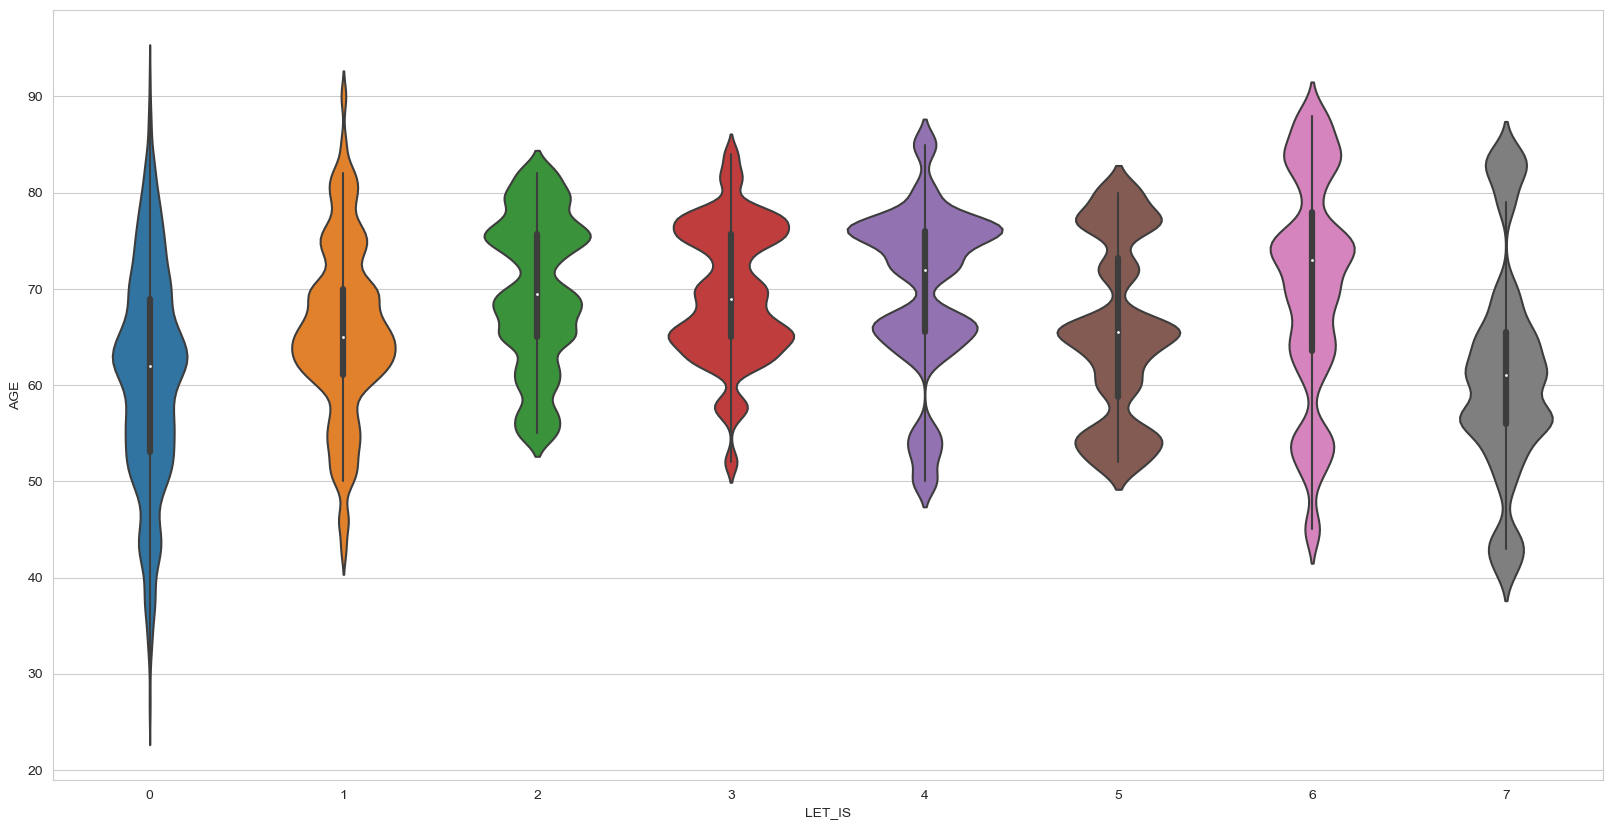

In [150]:
#violine plot
plt.figure(figsize=(20,10))
sns.violinplot(data= data
               
               , x='LET_IS',y='AGE',bw=.15)
plt.show()

/Users/Merwa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning:

The figure layout has changed to tight

/Users/Merwa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning:

The figure layout has changed to tight



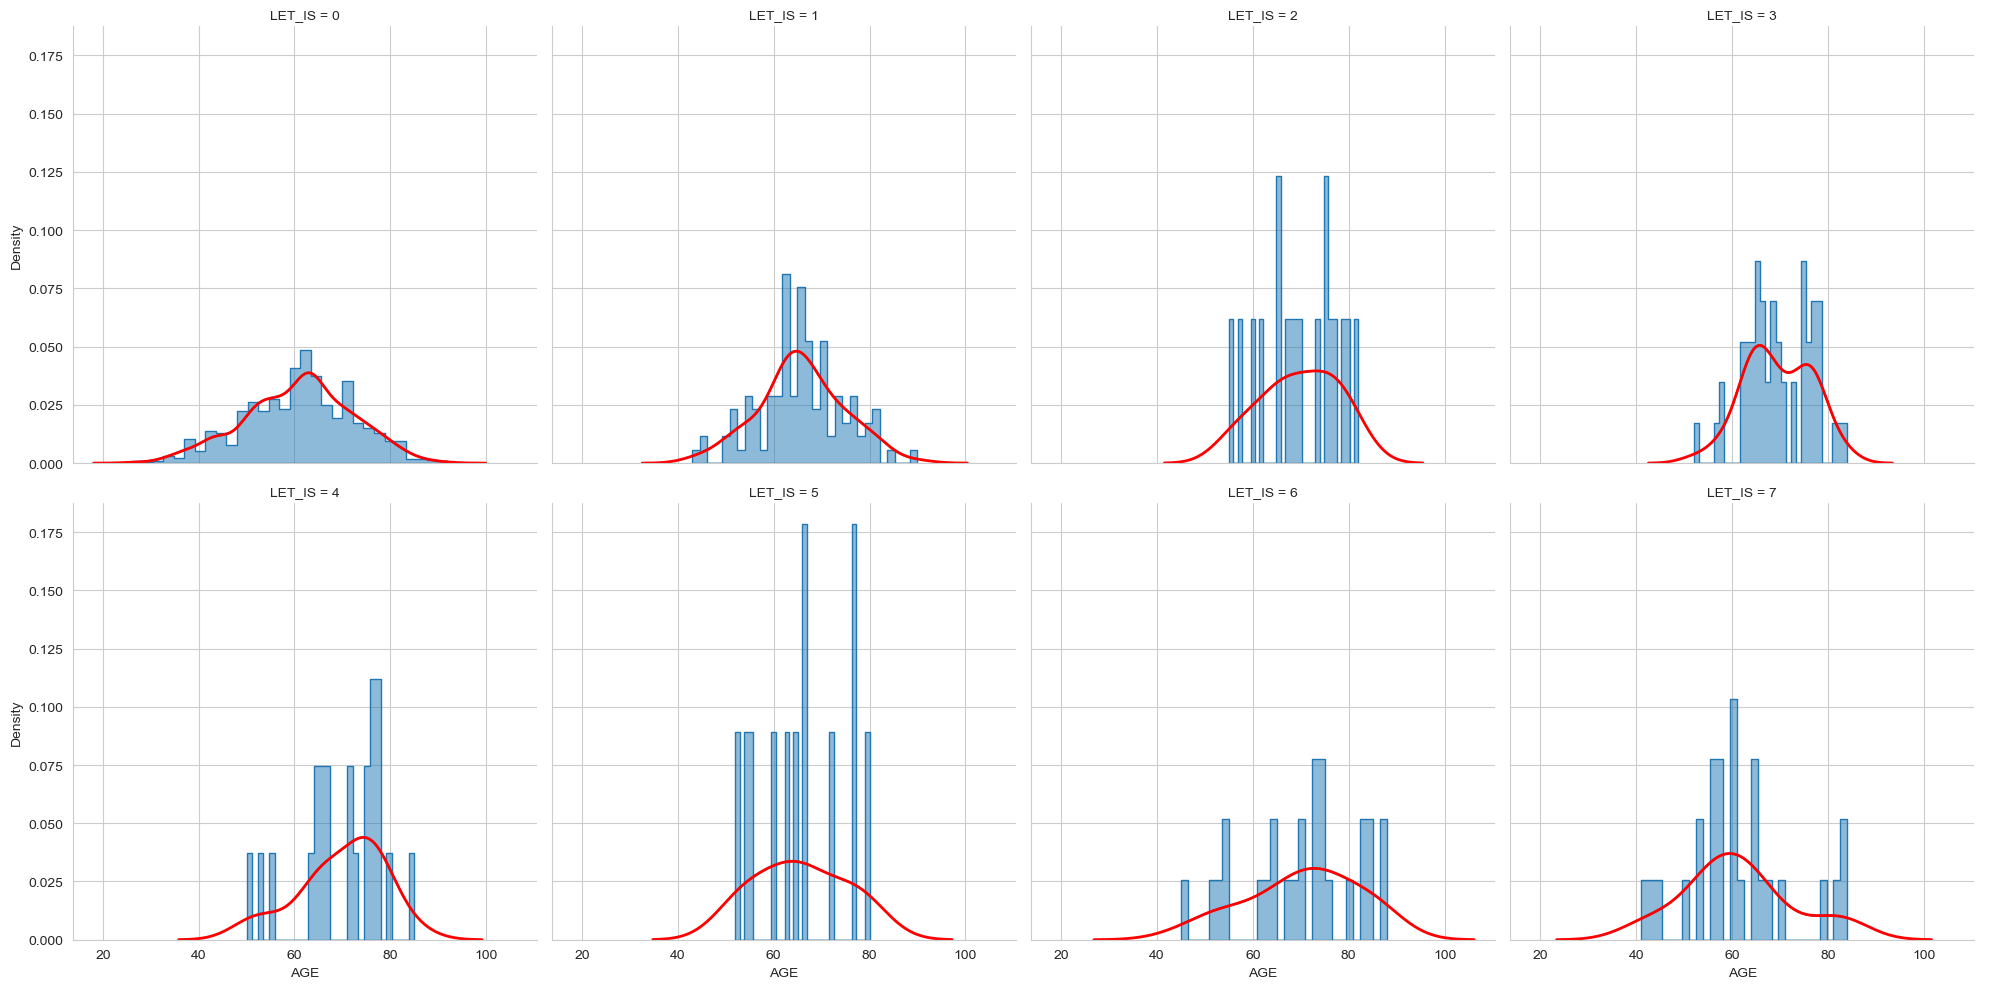

In [151]:
g = sns.FacetGrid(data, col='LET_IS', col_wrap=4, height=5)
g.map(sns.histplot, 'AGE', kde=True, bins=30, element="step", stat="density")
g.map(sns.kdeplot, 'AGE', color='r', lw=2)
g.add_legend()
plt.show()

/Users/Merwa/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/Merwa/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/Merwa/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/Mer

<Figure size 2000x1000 with 0 Axes>

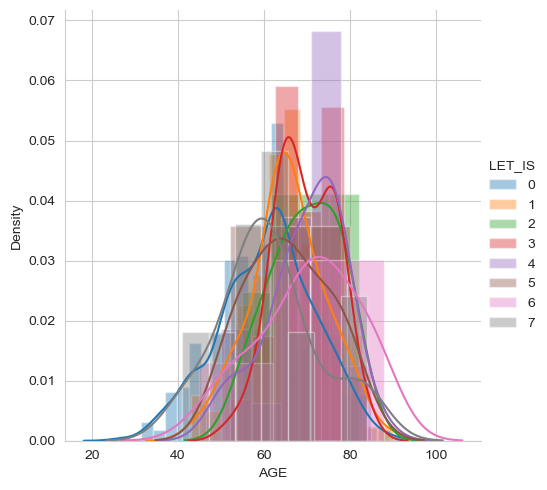

In [152]:
plt.figure(figsize=(20,10))
sns.FacetGrid(data,hue='LET_IS',height=5).map(sns.distplot,'AGE').add_legend()
plt.show()

[]

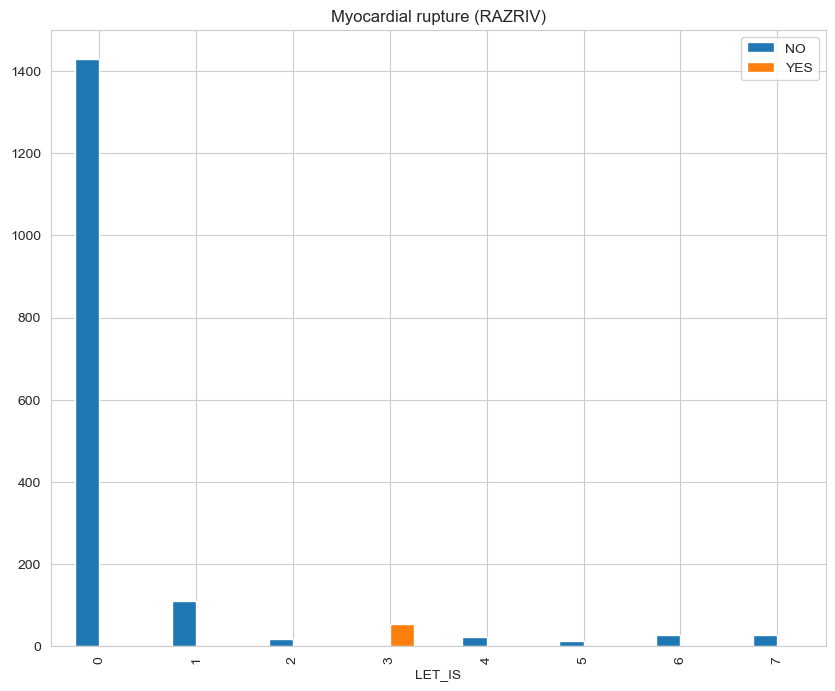

In [153]:
#Other Relation, can make more if you would like to
pd.crosstab(data['LET_IS'], data['RAZRIV']).plot(kind="bar", figsize=(10, 8), 
                                                   title="Myocardial rupture (RAZRIV)")
plt.legend(['NO','YES'],loc="upper right")
plt.plot()

Comments

We can see that RAZRIV on the Lethal outcome as for the other categories it is giving NO means the chances of myocardial rupture are less.
While in the 3rd category which is myocardial rupture itself it is showing positive realtion.

SPLITTING THE DATA

In [154]:
X_train, X_test, y_train, y_test = train_test_split(x, y_lo, test_size=0.3, random_state=42)

BALANCING THE DATA

In [155]:
smote = SMOTE(random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
# x_day1_resampled, y_resampled = smote.fit_resample(x_day1, y_zsn)
# x_day2_resampled, y_resampled = smote.fit_resample(x_day2, y_zsn)
# x_day3_resampled, y_resampled = smote.fit_resample(x_day3, y_zsn)

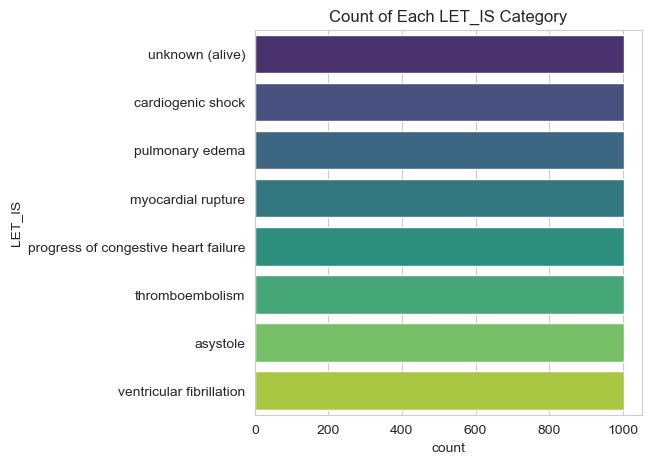

In [156]:
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.countplot(y=y_train_bal, palette='viridis', order=sorted(data['LET_IS'].unique()))
plt.title('Count of Each LET_IS Category')
plt.yticks(ticks=range(len(label_mapping)), labels=label_mapping.values(),ha='right')
plt.show()

Fitting LET_IS

Decision Tree with RFE

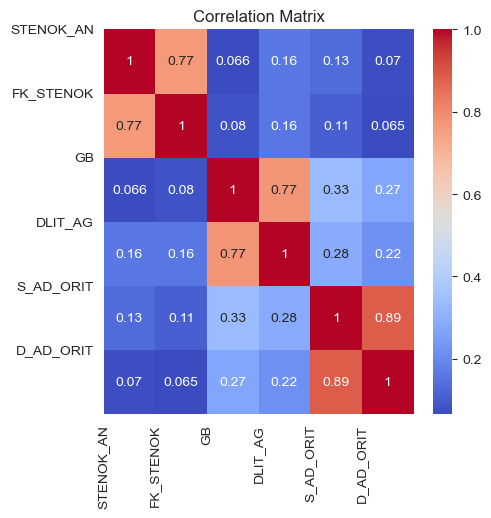

In [208]:
dt = DecisionTreeClassifier(random_state=42)

rfe = RFE(estimator=dt, n_features_to_select=40)
rfe.fit(x_train_bal, y_train_bal)

selected_features = x_train_bal.columns[rfe.support_]

corr_matrix = x_train_bal[selected_features].corr()
a=corr_matrix[(abs(corr_matrix)>0.75) & (abs(corr_matrix)<1)].isna()
cols=[]
for col in a.columns:
  if len(a[a[col]==False])>0:
    cols.append(col)
b=corr_matrix.loc[cols,cols]

plt.figure(figsize=(5, 5))
sns.heatmap(b, annot=True, cmap='coolwarm')
plt.xticks(range(len(b.columns)), b.columns, rotation=90)
plt.yticks(range(len(b.columns)), b.columns, rotation=0)
plt.title('Correlation Matrix')
plt.show()

In [193]:
# ECG rhythm at the time of admission to hospital – atrial fibrillation (ritm_ecg_p_02)
#.   vs Paroxysms of atrial fibrillation at the time of admission to intensivecare unit, (or at a pre-hospital stage) (MP_TP_POST)

# S_AD_ORIT VS D_AD_ORIT

# Frequent premature atrial contractions on ECG at the time of admission to hospital (n_r_ecg_p_02)
#.   vs LBBB (anterior branch) in the anamnesis (np_05)

x_train_bal_revised = x_train_bal.drop(columns=['D_AD_ORIT', 'MP_TP_POST', 'np_05'])
x_test_revised = X_test.drop(columns=['D_AD_ORIT', 'MP_TP_POST', 'np_05'])

In [159]:
# x_train_bal_revised = x_train_bal.drop(columns=['MP_TP_POST'])
# x_test_revised = X_test.drop(columns=['MP_TP_POST'])

In [160]:
# x_train_bal_revised = x_train_bal.drop(columns=[])
# x_test_revised = X_test.drop(columns=[])

Accuracy with RFE-selected features: 0.7549019607843137
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       426
           1       0.43      0.44      0.43        34
           2       0.00      0.00      0.00         3
           3       0.09      0.12      0.10        16
           4       0.14      0.11      0.12         9
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        11

    accuracy                           0.75       510
   macro avg       0.19      0.19      0.19       510
weighted avg       0.78      0.75      0.77       510



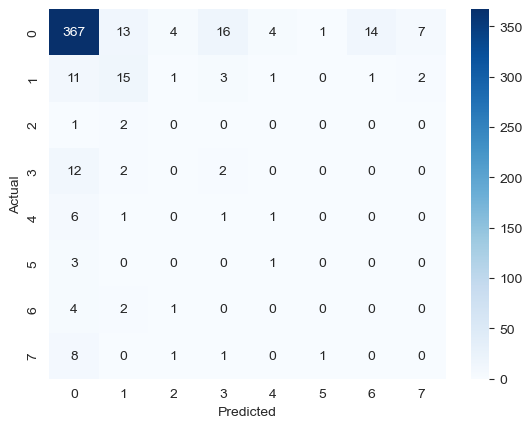

In [194]:
rfe = RFE(estimator=dt, n_features_to_select=97)
rfe.fit(x_train_bal_revised, y_train_bal)

X_train_rfecv = rfe.transform(x_train_bal_revised)
X_test_rfecv = rfe.transform(x_test_revised)

# # Calculate Z-scores
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_rfecv)
# X_test_scaled = scaler.transform(X_test_rfecv)

# # Identify rows with any feature Z-score above the threshold
# z_threshold = 3
# outliers = np.where((X_train_scaled > z_threshold) | (X_train_scaled < -z_threshold))[0]
# # X_train_rfecv_clean = X_train_rfecv.drop(index=outliers)
# # y_train_clean = y_train.drop(index=outliers)

# # Remove outliers from training data
# X_train_rfecv_clean = np.delete(X_train_rfecv, outliers, axis=0)
# y_train_clean = np.delete(y_train_bal, outliers, axis=0)


dt.fit(X_train_rfecv, y_train_bal)
y_pred = dt.predict(X_test_rfecv)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with RFE-selected features:", accuracy)
print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree with RFE-CV

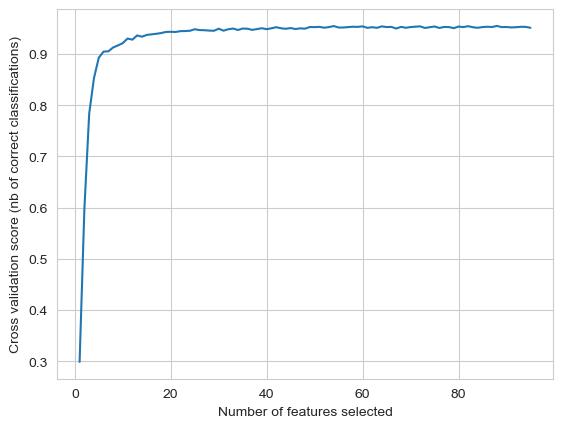

In [162]:
dt = DecisionTreeClassifier(random_state=42)

# Initialize RFECV with the decision tree and cross-validation
rfecv = RFECV(estimator=dt, step=1, cv=10, scoring='accuracy')
rfecv.fit(x_train_bal, y_train_bal)

# Plot number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

selected_features = x_train_bal.columns[rfecv.support_]

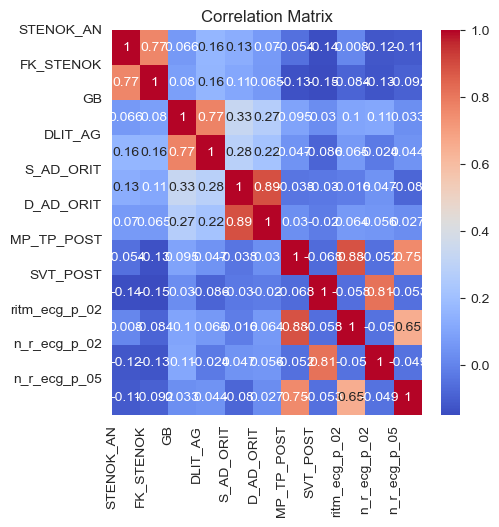

In [163]:
corr_matrix = x_train_bal[selected_features].corr()
a=corr_matrix[(abs(corr_matrix)>0.75) & (abs(corr_matrix)<1)].isna()
cols=[]
for col in a.columns:
  if len(a[a[col]==False])>0:
    cols.append(col)
b=corr_matrix.loc[cols,cols]

plt.figure(figsize=(5, 5))
sns.heatmap(b, annot=True, cmap='coolwarm')
plt.xticks(range(len(b.columns)), b.columns, rotation=90)
plt.yticks(range(len(b.columns)), b.columns, rotation=0)
plt.title('Correlation Matrix')
plt.show()

In [164]:
x_train_bal_revised = x_train_bal.drop(columns=['MP_TP_POST', 'D_AD_ORIT'])
x_test_revised = X_test.drop(columns=['MP_TP_POST', 'D_AD_ORIT'])

In [165]:
# x_train_bal_revised = x_train_bal.drop(columns=['D_AD_ORIT'])
# x_test_revised = X_test.drop(columns=['D_AD_ORIT'])

In [166]:
# x_train_bal_revised = x_train_bal.drop(columns=['np_05', 'D_AD_ORIT'])
# x_test_revised = X_test.drop(columns=['np_05', 'D_AD_ORIT'])

Accuracy with RFECV-selected features: 0.7529411764705882
Selected 62 features using RFECV: ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_03', 'nr_04', 'nr_08', 'np_08', 'np_10', 'endocr_01', 'endocr_02', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'S_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'SVT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_07', 'n_r_ecg_p_01', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_p_ecg_p_03', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_06', 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'NITR_S', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TRENT_S_n']
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       426
           1       0.

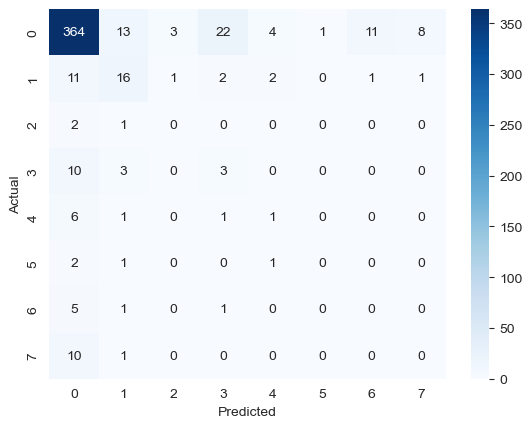

In [167]:
rfecv = RFECV(estimator=dt, step=1, cv=10, scoring='accuracy')
rfecv.fit(x_train_bal_revised, y_train_bal)

selected_features = x_train_bal_revised.columns[rfecv.support_]

X_train_rfecv = rfecv.transform(x_train_bal_revised)
X_test_rfecv = rfecv.transform(x_test_revised)

# # Calculate Z-scores
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_rfecv)
# X_test_scaled = scaler.transform(X_test_rfecv)

# # Identify rows with any feature Z-score above the threshold
# z_threshold = 3
# outliers = np.where((X_train_scaled > z_threshold) | (X_train_scaled < -z_threshold))[0]
# # X_train_rfecv_clean = X_train_rfecv.drop(index=outliers)
# # y_train_clean = y_train.drop(index=outliers)

# # Remove outliers from training data
# X_train_rfecv_clean = np.delete(X_train_rfecv, outliers, axis=0)
# y_train_clean = np.delete(y_train_bal, outliers, axis=0)


dt.fit(X_train_rfecv, y_train_bal)
y_pred = dt.predict(X_test_rfecv)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with RFECV-selected features:", accuracy)
print(f"Selected {len(selected_features)} features using RFECV:", selected_features.tolist())
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

XGBoost with Feature Importance

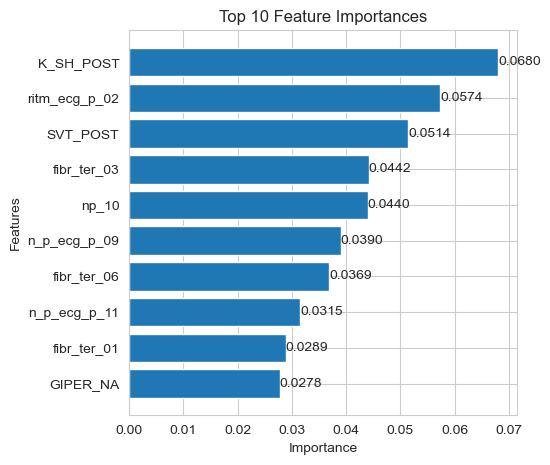

In [174]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train_bal, y_train_bal)

feature_importance = xgb.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': x_train_bal.columns,
    'Importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df['Cumulative Importance'] = feature_importance_df['Importance'].cumsum()
threshold = 0.45
selected_features_df = feature_importance_df[feature_importance_df['Cumulative Importance'] <= threshold]

plt.figure(figsize=(5, 5))
bars = plt.barh(selected_features_df['Feature'], selected_features_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title(f"Top {len(selected_features_df)} Feature Importances")
plt.gca().invert_yaxis()  

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{width:.4f}', 
             ha='left', va='center')

plt.show()

In [175]:
# corr_matrix = x_train_bal[selected_features_df['Feature']].corr()
# a=corr_matrix[(abs(corr_matrix)>0.35) & (abs(corr_matrix)<1)].isna()
# cols=[]
# for col in a.columns:
#   if len(a[a[col]==False])>0:
#     cols.append(col)
# b=corr_matrix.loc[cols,cols]

# plt.figure(figsize=(5, 5))
# sns.heatmap(b, annot=True, cmap='coolwarm')
# plt.xticks(range(len(b.columns)), b.columns, rotation=90)
# plt.yticks(range(len(b.columns)), b.columns)
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
x_train_bal_revised = x_train_bal.drop(columns=[])
x_test_revised = X_test.drop(columns=[])

In [ ]:
# Transform the dataset
X_train_selected = x_train_bal[selected_features_df['Feature']]
X_test_selected = X_test[selected_features_df['Feature']]

# Evaluate the performance
xgb.fit(X_train_selected, y_train_bal)
y_pred = xgb.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with top features:", accuracy)
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

XGBoost with RFE

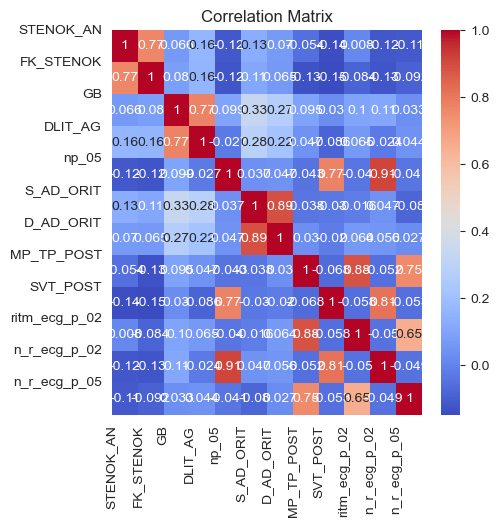

In [201]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

rfe = RFE(estimator=xgb, n_features_to_select=100)
rfe.fit(x_train_bal, y_train_bal)

selected_features = x_train_bal.columns[rfe.support_]

corr_matrix = x_train_bal[selected_features].corr()
a=corr_matrix[(abs(corr_matrix)>0.75) & (abs(corr_matrix)<1)].isna()
cols=[]
for col in a.columns:
  if len(a[a[col]==False])>0:
    cols.append(col)
b=corr_matrix.loc[cols,cols]

plt.figure(figsize=(5, 5))
sns.heatmap(b, annot=True, cmap='coolwarm')
plt.xticks(range(len(b.columns)), b.columns, rotation=90)
plt.yticks(range(len(b.columns)), b.columns)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
x_train_bal_revised = x_train_bal.drop(columns=[])
x_test_revised = X_test.drop(columns=[])

In [202]:
x_train_bal_revised = x_train_bal.drop(columns=['MP_TP_POST','D_AD_ORIT', 'np_05'])
x_test_revised = X_test.drop(columns=['MP_TP_POST','D_AD_ORIT', 'np_05'])

In [ ]:
# x_train_bal_revised = x_train_bal.drop(columns=['D_AD_ORIT'])
# x_test_revised = X_test.drop(columns=['D_AD_ORIT'])

In [ ]:
# x_train_bal_revised = x_train_bal.drop(columns=['np_05'])
# x_test_revised = X_test.drop(columns=['np_05'])

Accuracy with RFE-selected features: 0.8568627450980392
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       426
           1       0.65      0.44      0.53        34
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        11

    accuracy                           0.86       510
   macro avg       0.19      0.18      0.18       510
weighted avg       0.77      0.86      0.81       510

Confusion Matrix:


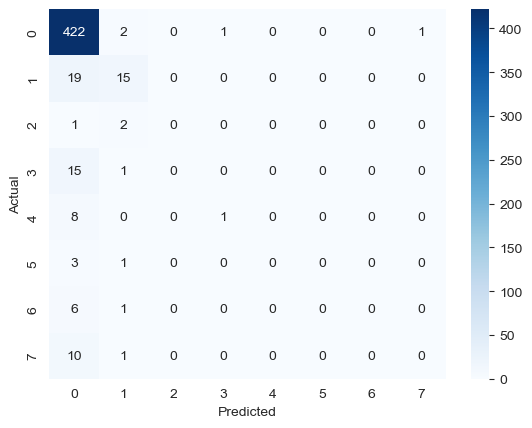

In [203]:
rfe = RFE(estimator=xgb, n_features_to_select=97)
rfe.fit(x_train_bal_revised, y_train_bal)

X_train_selected = rfe.transform(x_train_bal_revised)
X_test_selected = rfe.transform(x_test_revised)

xgb.fit(X_train_selected, y_train_bal)

accuracy = xgb.score(X_test_selected, y_test)
print("Accuracy with RFE-selected features:", accuracy)

y_pred = xgb.predict(X_test_selected)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Generate a confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Plotting Accuracy with Feature Selection method

In [205]:
df = pd.DataFrame({'Features': range(20,110,10),
              'DT_RFE': [75, 75, 76, 75, 75, 75, 74, 74, 75],
              'XGB_RFE': [83, 85, 83, 85, 86, 86, 86, 86, 86]})

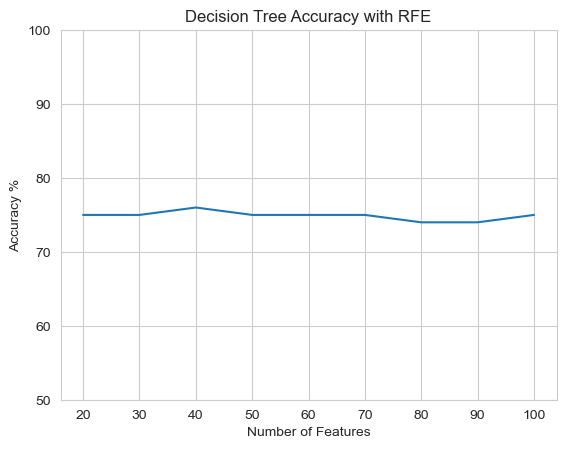

In [206]:
plt.plot(df['Features'], df['DT_RFE'])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy %')
plt.title('Decision Tree Accuracy with RFE')
plt.ylim(50,100)
plt.show()

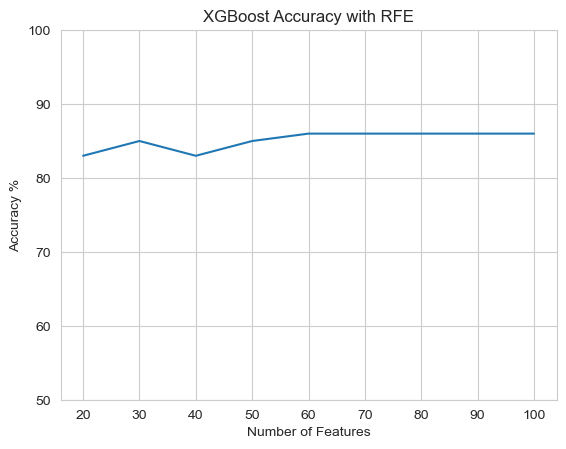

In [207]:
plt.plot(df['Features'], df['XGB_RFE'])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy %')
plt.title('XGBoost Accuracy with RFE')
plt.ylim(50,100)
plt.show()